In [1]:
# 訓練資料集Google 2012-2016的股價。1258筆
# 測試資料集Google 2017的股價。20筆
!wget https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Train.csv
!wget https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Test.csv

--2024-10-30 04:35:50--  https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Train.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shhuangmust/AI/111-2/Google_Stock_Price_Train.csv [following]
--2024-10-30 04:35:50--  https://raw.githubusercontent.com/shhuangmust/AI/111-2/Google_Stock_Price_Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63488 (62K) [text/plain]
Saving to: ‘Google_Stock_Price_Train.csv’

Google_Stock_Price_ 100%[===================>]  62.00K  --.-KB/s    in 0.003s  

2024-10-30 04:35:50 (21.2 MB/s) - ‘Google_Stock_Price_Train.csv’ saved [63488/63488]

In [2]:
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd

# 讀取訓練資料集
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')  # 讀取訓練集
# 取出Open股票指數欄位值
training_set = dataset_train.iloc[:, 1:2].values  # 取「Open」欄位值

# Feature Scaling 把股票指數變成0-1之間的數字
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []   #預測點的前 60 天的資料
y_train = []   #預測點
for i in range(60, 1258):  # 1258 是訓練集總數
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [3]:
# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = 65, batch_size = 32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0827
Epoch 2/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0063
Epoch 3/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0057
Epoch 4/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054
Epoch 5/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0046
Epoch 6/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0046
Epoch 7/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0061
Epoch 8/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0052
Epoch 9/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0040
Epoch 10/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0047
Epoch 11/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0043
Epoch 12/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0041
Epoch 13/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0039
Epoch 14/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0038
Epoch 15/65
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038
Epoc

In [4]:
# 讀取2017股票測試資料集
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
# 抓出OPEN股票指數欄位值
real_stock_price = dataset_test.iloc[:, 1:2].values

#抓出2017年前60天的資料
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) # Feature Scaling

X_test = []
for i in range(60, 80):  # timesteps一樣60； 80 = 先前的60天資料+2017年的20天資料
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape 成 3-dimension
# 預測股票指數
predicted_stock_price = regressor.predict(X_test)
# 把預測結果從0~1之間還原為原來的股票指數
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # to get the original scale


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


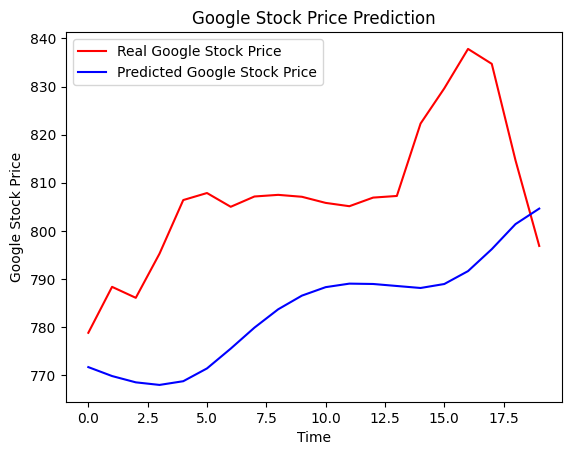

In [5]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')  # 紅線表示真實股價
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')  # 藍線表示預測股價
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()